# Projektna naloga pri predmetu Statistične metode v edukaciji

## Matematična anksioznost in motivacija

### Ljubljana, april 2024

#### Avtor: Bor Bregant

#### Mentorica: doc. dr. Ana Slavec
---

### Struktura projektne naloge:

    Vsako poglavje se začne z naslovom.
    Sama statistika je v blokih kode s komentarji za znakom #.
    Obrazložitev je v tekstovnih blokih


<link rel="stylesheet" type="text/css" href="STATISTIKA.css">

In [1]:
#=============================
#Tu bomo uvozili vse potrebne pakete (knjižnice)
#=============================
import numpy as np                              #Za obdelavo datasetov in elementarno računanje
import pandas as pd                             #Za obdelavo
from sklearn.preprocessing import LabelEncoder  #Za kodiranje kategoričnih spremenljivk
import pingouin as pg                           #Za statistiko (\alpha)
from matplotlib import pyplot                   #Za vizualizacijo
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed                   #Za "ponavljivost" metod, ki morebitno uporabljajo šum
from scipy.stats import pearsonr                #Scipy.stats je paket za statistične funkcije
from scipy.stats import shapiro, probplot
from scipy import stats
import statsmodels.formula.api as smf           #Linearna regresija
from sklearn.linear_model import LinearRegression

seed(42) #Nastavimo seme za ponavljivost

c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


<div style="padding: 10px; border-radius: 5px;">
    <h1 style="color: #E6E6FA;">Uvoz datoteke</h1>
    <p>Na tem mestu bomo uvozili ne-anomiziran nabor podatkov</p>
</div>

Vzorec sestavlja 89 dijakov drugega in tretjega letnika izbrane slovenske gimnazije.

In [2]:
df = pd.read_csv("motivacija.csv") #Preberemo datoteko

#Izpustimo stolpce, ki niso relevantni
df.drop("Časovni žig", axis=1, inplace=True)
df.drop("Uporabniško ime", axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

#=============================
#Tu bomo pred vpogledom najprej podatke anonimizirali s pomočjo "label" oz. kategoričnega kodiranja.
#=============================
le = LabelEncoder()
 
label = le.fit_transform(df['Razred'])          #Transformiramo stolpec, ki se nanaša na razred, slednjega izbrišemo in nadomestimo s kodiranim
df.drop("Razred", axis=1, inplace=True)
df["Razred"] = label

label = le.fit_transform(df['Učeči profesor'])  #Enako za profesorja, ki razred uči
df.drop("Učeči profesor", axis=1, inplace=True)
df["Profesor"] = label

label = le.fit_transform(df['Spol'])            #In za spol (čeprav ni potrebno anonimiziranja)
df.drop("Spol", axis=1, inplace=True)
df["Spol"] = label

df = df.apply(pd.to_numeric)                    #Zdaj, ko nam je struktura všeč, vse spremenljivke (tudi kategorične npr. spol) nadomestimo z numerično vrednostjo

df.head()                                       #In pogledamo, kaj smo dobili :)

,V moji izobraževalni poti želim imeti čim več matematike,Na fakulteti bi se rad izognil matematiki,Težavnost matematike me privlači,Učenje (napredne) matematike smatram za uporabno,Deljenje idej za reševanje matematičnega problema mi je v coni udobja,Rad imam matematiko,Matematika je dolgočasna,Uporaba in iskanje formul ter tabel na zadnji strani poglavja v učbeniku,Razmišljanje o testu matematike dan prej,"Gledanje profesorja, ki na tablo rešuje enačbo",Test matematike,Domače naloge pri matematiki,Poslušanje ure matematike v razredu,"Poslušanje sošolca, ki razlaga snov pri matematiki",Pisanje kratkega nenapovedanega preverjanja pri matematiki,Začetek nove snovi pri pouku matematike,Razred,Profesor,Spol
0,4,1,3,3,4,5,2,1,1,1,2,3,1,1,5,1,5,1,0
1,4,1,1,4,3,4,2,2,4,2,5,2,3,1,5,2,5,1,1
2,3,2,4,3,2,4,3,1,2,1,3,1,2,2,4,1,3,1,0
3,3,4,1,3,2,3,3,3,5,2,5,4,4,3,5,4,5,1,1
4,3,3,3,2,3,4,1,4,4,4,4,4,5,4,2,3,3,1,1


In [3]:
print("Število vrstic:", len(df))           #Koliko je velik naš vzorec
print("Število stolpcev:", len(df.columns)) #Kako dolg imamo vprašalnik
print(df['Razred'].nunique())               #Koliko imamo različnih stratumov (možnih vrednosti) za razed
print(df['Profesor'].nunique())             #Enako za učeče profesorje

Število vrstic: 89
Število stolpcev: 19
6
3


<div style="padding: 10px; border-radius: 5px;">
    <h3 style="color: #9400D3;">Interpretacija</h3>
    <p style="color: #9400D3;">Imamo 89 rešenih odgovorov za vprašalnik, ki ga je sestavljalo 19 vprašanj.</p>
    <p style="color: #9400D3;">Prvih sedem sestavlja spremenljivko "Motivacija". Dve vprašanji sta inverzno točkovani, vsa pa na Likertovi lestvici od 1 do 5. Spremenljivke so torej ordinalne, ki jih bomo združili v eno diskretno (na merski lestvici ...). Vprašanja so izveta iz uveljavljenega instrumenta ATMI (Attitudes towards mathematics instruction)</p>
    <p style="color: #9400D3;">Naslednjih devet vprašanj sestavlja matematično anksioznost. Prav tako ordinalne spremenljivke, ki jih bomo združili v diskretno.</p>
</div>

# Kalkulacija kronbach alpha

Na tem mestu bomo vprašanja, ki določajo eno spremenljivko združili in določili notranjo konsistenco vprašalnikov

In [4]:
included_columns = ['V moji izobraževalni poti želim imeti čim več matematike', 'Na fakulteti bi se rad izognil matematiki', 'Težavnost matematike me privlači', 'Učenje (napredne) matematike smatram za uporabno', 'Deljenje idej za reševanje matematičnega problema mi je v coni udobja',"Rad imam matematiko","Matematika je dolgočasna"]  # Vključimo stolpce, ki določajo motivacijo

# Reverzno točkovani odgovori (želimo torej 2 <-> 4 in 1 <-> 5)
reverse_score_columns = ['Na fakulteti bi se rad izognil matematiki', 'Matematika je dolgočasna']

# Funkcija za reverzno točkovanje
def reverse_score(x):
    return max(x) + min(x) - x

# To funkcijo uporabimo na željenih vprašanjih
for col in reverse_score_columns:
    df[col] = reverse_score(df[col])

# Izračun notranje konsistence
alpha, ci = pg.cronbach_alpha(df[included_columns], ci=0.95)
print("Cronbach's Alpha:", alpha)
print("Confidence Interval:", ci)

Cronbach's Alpha: 0.9175220227495999
Confidence Interval: [0.888 0.941]


In [5]:
#Enako za anksioznost
included_columns = ['Uporaba in iskanje formul ter tabel na zadnji strani poglavja v učbeniku','Razmišljanje o testu matematike dan prej','Gledanje profesorja, ki na tablo rešuje enačbo',"Domače naloge pri matematiki","Poslušanje ure matematike v razredu","Poslušanje sošolca, ki razlaga snov pri matematiki","Pisanje kratkega nenapovedanega preverjanja pri matematiki","Začetek nove snovi pri pouku matematike"]

for col in reverse_score_columns:
    df[col] = reverse_score(df[col])

alpha, ci = pg.cronbach_alpha(df[included_columns], ci=0.95)
print("Cronbach's Alpha:", alpha)
print("Confidence Interval:", ci)

Cronbach's Alpha: 0.8375165268656393
Confidence Interval: [0.781 0.884]


<div style="padding: 10px; border-radius: 5px;">
    <h3 style="color: #9400D3;">Interpretacija notranje konsistentnosti vprašalnikov</h3>
    <p style="color: #9400D3;">Vprašalnik za matematično anksioznost je odličen glede notr. konsistentnosti (angl. reliability), za mat. motivacijo pa dober.</p>
</div>

### Ti dve spremenljivki bomo zdaj izračunali iz več vprašanj

In [6]:
#Izračunamo (po funkciji reverse_score, če je potrebno) in izbrišemo stolpce, ki niso več potrebni
df['Motivacija'] = df['V moji izobraževalni poti želim imeti čim več matematike'] +6-df['Na fakulteti bi se rad izognil matematiki'] + df['Težavnost matematike me privlači'] + df['Učenje (napredne) matematike smatram za uporabno'] + df["Deljenje idej za reševanje matematičnega problema mi je v coni udobja"] +df["Rad imam matematiko"] +6-df["Matematika je dolgočasna"]

df.drop(['V moji izobraževalni poti želim imeti čim več matematike', 'Na fakulteti bi se rad izognil matematiki', 'Težavnost matematike me privlači', 'Učenje (napredne) matematike smatram za uporabno', "Deljenje idej za reševanje matematičnega problema mi je v coni udobja", "Rad imam matematiko", "Matematika je dolgočasna"], axis=1, inplace=True)

In [7]:
df['Anksioznost'] = df['Uporaba in iskanje formul ter tabel na zadnji strani poglavja v učbeniku'] + df['Razmišljanje o testu matematike dan prej'] + df['Gledanje profesorja, ki na tablo rešuje enačbo'] + df['Test matematike'] + df["Domače naloge pri matematiki"] +df["Poslušanje ure matematike v razredu"] + df["Poslušanje sošolca, ki razlaga snov pri matematiki"] + df["Pisanje kratkega nenapovedanega preverjanja pri matematiki"] + df["Začetek nove snovi pri pouku matematike"]


df.drop(['Uporaba in iskanje formul ter tabel na zadnji strani poglavja v učbeniku', 'Razmišljanje o testu matematike dan prej', 'Gledanje profesorja, ki na tablo rešuje enačbo', 'Test matematike', "Domače naloge pri matematiki", "Poslušanje ure matematike v razredu", "Poslušanje sošolca, ki razlaga snov pri matematiki", "Pisanje kratkega nenapovedanega preverjanja pri matematiki", "Začetek nove snovi pri pouku matematike"], axis=1, inplace=True)

In [8]:
#Če bi želeli, bi lako prečiščeno datoteko še shranili
#df.to_excel("data_cleaned_NE_SHRANI.xlsx")
df.head()

,Razred,Profesor,Spol,Motivacija,Anksioznost
0,5,1,0,28,16
1,5,1,1,25,26
2,3,1,0,23,17
3,5,1,1,17,35
4,3,1,1,23,34


<div style="padding: 10px; border-radius: 5px;">
    <p style="color: #9400D3;">Dobili smo tabelo pripravljeno za statistično obdelavo.</p>
</div>

Op. avtorja: Imamo sicer še večji nabor podatkov v drugi datoteki, a je ta bolj prikladna za ta predmet.

In [9]:
#Če bi želeli, bi lahko podatke še skalirali. S tem bi sicer izgubili možnost primerjave z drugimi raziskavami, ki uporabljajo enake instrumente, toda marsikaj tudi pridobimo.

#from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()

#df[['Motivacija', 'Anksioznost']] = scaler.fit_transform(df[['Motivacija', 'Anksioznost']])

<div style="padding: 10px; border-radius: 5px;">
    <h1 style="color: #E6E6FA;">Vizualizacija podatkov in deskriptivna analiza</h1>
    <p>Na tem mestu bomo podatke vizualizirali in jih deksriptivno opisali</p>
</div>

In [10]:
#Najprej si oglejmo osnovne statistične pojme povprečja, stand. odklona, min., max., in informacije o kvantilih

selected_columns = ['Motivacija', 'Anksioznost'] #Izberemo smiselni spremenljivki za to analizo

print(df[selected_columns].describe().round(2)) # Opišemo in zaokrožimo

       Motivacija  Anksioznost
count       89.00        89.00
mean        21.04        26.48
std          7.60         8.35
min          8.00         9.00
25%         15.00        20.00
50%         22.00        27.00
75%         28.00        32.00
max         35.00        44.00


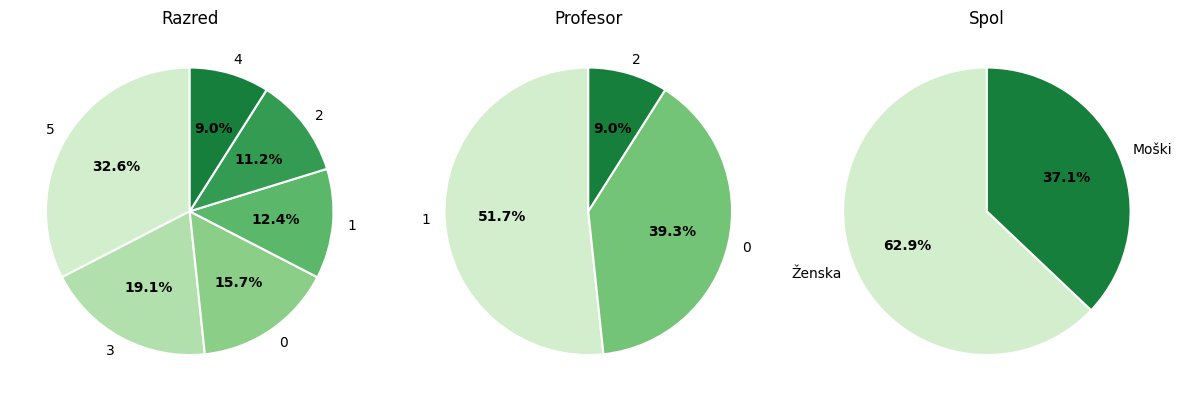

In [11]:
# Izberemo kategorične spremenljivke
categories = ['Razred', 'Profesor', 'Spol']
green = ['#2ca02c', '#57b894', '#9cd8a6']  # Vse bomo označili z enako barvo
fig, axs = plt.subplots(1, 3, figsize=(12, 4)) #Določimo same parametre grafa

# Izračunamo deleže in narišemo grafe
for i, category in enumerate(categories):
    values = df[category].value_counts()
    percentages = (values / values.sum()) * 100
    
    # Kategorije spola seveda poznamo
    if category == 'Spol':
        values.index = values.index.map({0: 'Moški', 1: 'Ženska'}.get)
    
    # Dodelimo barvo
    hues = np.linspace(0.2, 0.8, len(values))  # Malenkosti...
    colors = [plt.cm.Greens(hue) for hue in hues]

    wedges, texts, autotexts = axs[i].pie(values, labels=values.index,
                                          colors=colors, startangle=90, autopct='%1.1f%%',
                                          wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
    
    plt.setp(autotexts, size=10, weight="bold")  # Prilagodimo opisne dele grafa
    axs[i].set_title(category)

plt.tight_layout()
plt.show()


Zgornje podatek o kvantilih lahko tudi vizualiziramo. Namesto škatle z brki uporabimo violinsko alternativo, ki vključi tudi samo porazdelitev

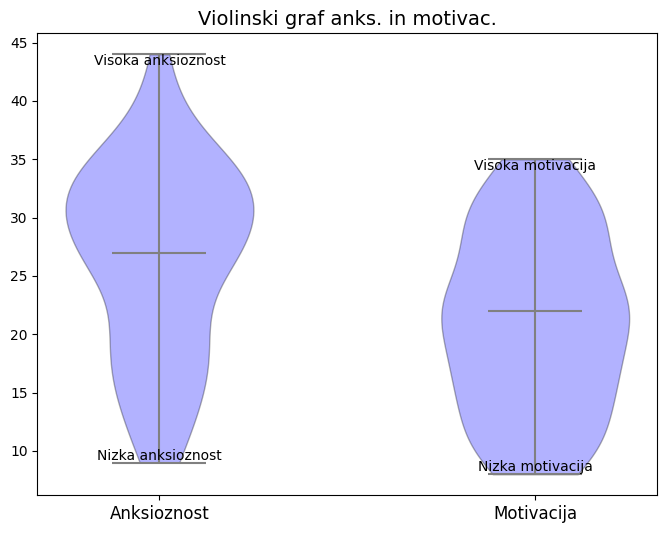

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))  # Specificiramo parametre grafa
data_to_plot = [df["Anksioznost"], df["Motivacija"]]
positions = [1, 2]

# Naredimo graf
bp = ax.violinplot(data_to_plot, positions=positions, showmedians=True)

# Specificiramo barve
colors = ['blue', 'blue']
for pc, color in zip(bp['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')  # Za večjo vidljivost dodamo robove

# Prikažemo mediano in min in max
for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
    vp = bp[partname]
    vp.set_edgecolor('grey')

# Dodamo legendo
ax.set_xticks(positions)
ax.set_xticklabels(['Anksioznost', 'Motivacija'], fontsize=12)  # Adjust font size

# Specificiramo vrednosti (niti ni zares potrebno...)
top_labels = ["Nizka anksioznost", "Nizka motivacija"]
bottom_labels = ["Visoka anksioznost", "Visoka motivacija"]

# Dodamo specificirane vrednosti
for i, data in enumerate(data_to_plot):
    min_value = min(data)
    max_value = max(data)
    ax.text(positions[i], min_value, top_labels[i], ha='center', va='bottom', fontsize=10)  # Adjust font size
    ax.text(positions[i], max_value, bottom_labels[i], ha='center', va='top', fontsize=10)  # Adjust font size

# Dodamo naslov
plt.title('Violinski graf anks. in motivac.', fontsize=14)  # Adjust title font size

plt.show()

Vizualiziramo še obe spremenljivki na enem grafikonu (na dva načina).

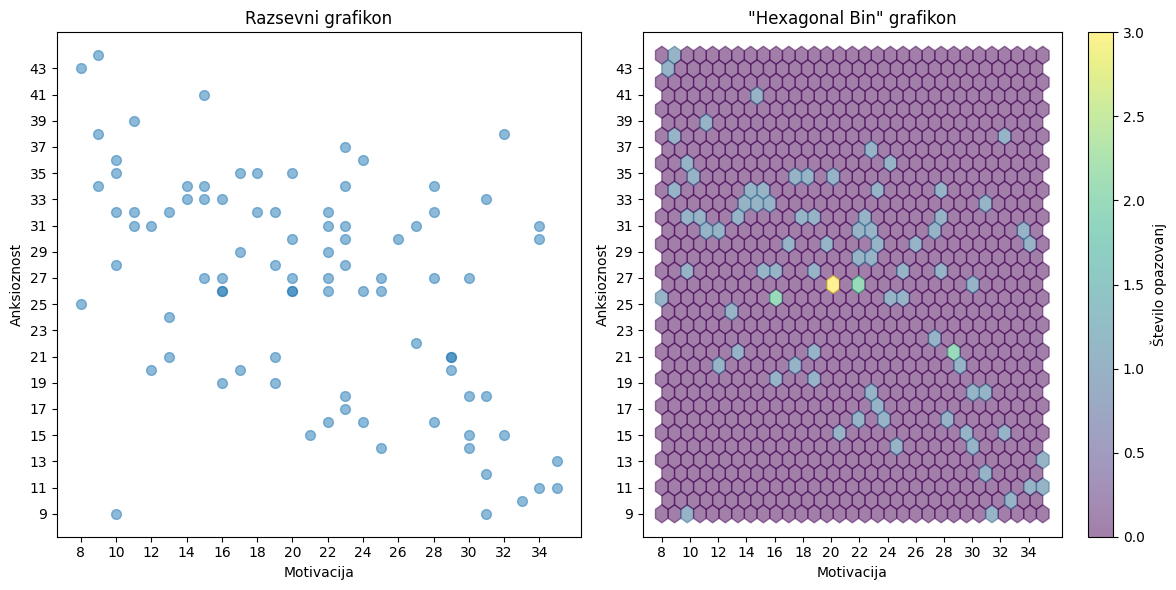

In [13]:
min_motivacija = df["Motivacija"].min()
max_motivacija = df["Motivacija"].max()
min_anksioznost = df["Anksioznost"].min()
max_anksioznost = df["Anksioznost"].max()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Najprej narišimo razsevni grafikon
axs[0].scatter(df["Motivacija"], df["Anksioznost"], alpha=0.5, s=50) #alpha nam pomaga razkriti, če imamo več vrednosti (transparentnost), s pa določa velikost
axs[0].set_xlabel('Motivacija')
axs[0].set_ylabel('Anksioznost')
axs[0].set_title('Razsevni grafikon')

# In še hexbin
hb = axs[1].hexbin(df["Motivacija"], df["Anksioznost"], gridsize=30, alpha=0.5)
axs[1].set_xlabel('Motivacija')
axs[1].set_ylabel('Anksioznost')
axs[1].set_title('"Hexagonal Bin" grafikon')

# Dodamo legendo za število vrednosti
plt.colorbar(hb, ax=axs[1], label='Število opazovanj')

# Želimo bolj gosto skalo spremenljivk (na dve vrednosti)
axs[0].set_xticks(np.arange(min_motivacija, max_motivacija + 1, 2))
axs[0].set_yticks(np.arange(min_anksioznost, max_anksioznost + 1, 2))
axs[1].set_xticks(np.arange(min_motivacija, max_motivacija + 1, 2))
axs[1].set_yticks(np.arange(min_anksioznost, max_anksioznost + 1, 2))

plt.tight_layout()
plt.show()

<div style="padding: 10px; border-radius: 5px;">
    <h3 style="color: #9400D3;">Interpretacija</h3>
    <p style="color: #9400D3;">Glede na zgornja grafikona lahko postavimo hipotezo, da med spremenljivkama velja blaga negativna korelacija in blaga linearna zveza.</p>
</div>

<div style="padding: 10px; border-radius: 5px;">
    <h1 style="color: #E6E6FA;">Interferenčna analiza</h1>
    <p>Na tem mestu bomo podatke analizirali</p>
    <p>Raziskali bomo:
        <ol type="i">
            <li>Korelacijo</li>
            <li>Vpliv spola</li>
        </ol>
    </p>
    <p>Pred tem pa moramo ugotoviti predpostavke metod. Testirali bomo:
        <ol type="i">
            <li>Normalnost</li>
            <li>Linearnost</li>
        </ol>
    </p>
</div>

<div style="padding: 10px; border-radius: 5px;">
    <h2 style="color: #E6E6FA;">Test normalnosti</h2>
    <p>Normalnost porazdelitve anksioznosti in motivacije bomo testirali s Shapiro-Wilkovim (SW) testom, saj je primeren za manjše vzorce</p>
    <p>Poslužili se bomo še QQ diagrama za primerjavo glede normalne porazdelitve</p>
</div>

Shapiro-Wilkov rezultat za Motivacija:
P-vrednost: 0.0124
Spremenljivka Motivacija ne deluje normalna (zavrnemo H0)


Shapiro-Wilkov rezultat za Anksioznost:
P-vrednost: 0.0180
Spremenljivka Anksioznost ne deluje normalna (zavrnemo H0)


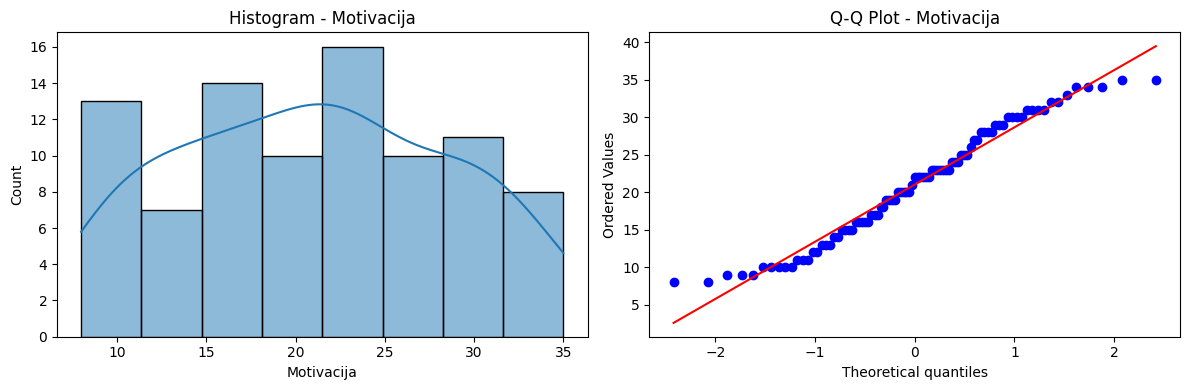

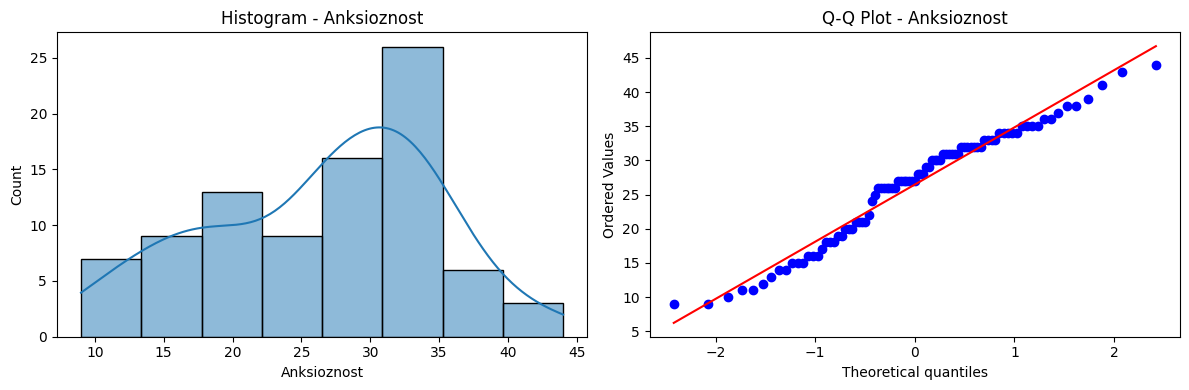

In [14]:
column1 = "Motivacija"  # Specificiramo spremenljivki, ki ju testiramo
column2 = "Anksioznost"

# Uporabimo testno funkcijo
statistic1, p_value1 = shapiro(df[column1])
statistic2, p_value2 = shapiro(df[column2])

# In jo prikažemo, skupaj s p-vrednostjo. Dodamo še opombo, ali je hipoteza o normalnosti zavrnjena, glede na p.
print(f"Shapiro-Wilkov rezultat za {column1}:")
print(f"P-vrednost: {p_value1:.4f}")
if p_value1 > 0.05:
    print(f"Spremenljivka {column1} izgleda normalna (ne zavrnemo H0)")
else:
    print(f"Spremenljivka {column1} ne deluje normalna (zavrnemo H0)")

print("\n")

print(f"Shapiro-Wilkov rezultat za {column2}:")
print(f"P-vrednost: {p_value2:.4f}")
if p_value2 > 0.05:
    print(f"Spremenljivka {column2} izgleda normalna (ne zavrnemo H0)")
else:
    print(f"Spremenljivka {column2} ne deluje normalna (zavrnemo H0)")

# Vizualni prikaz
plt.figure(figsize=(12, 4))

# Histogram za motivacijo
plt.subplot(1, 2, 1)
sns.histplot(df[column1], kde=True)
plt.title(f'Histogram - {column1}')

# Q-Q grafikon za motivacijo
plt.subplot(1, 2, 2)
probplot(df[column1], dist="norm", plot=plt)
plt.title(f'Q-Q Plot - {column1}')

plt.tight_layout()
plt.show()

# Vizualni prikaz za anksioznost
plt.figure(figsize=(12, 4))

# Histogram za anksioznost
plt.subplot(1, 2, 1)
sns.histplot(df[column2], kde=True)
plt.title(f'Histogram - {column2}')

# Q-Q grafikon za anksioznost
plt.subplot(1, 2, 2)
probplot(df[column2], dist="norm", plot=plt)
plt.title(f'Q-Q Plot - {column2}')

plt.tight_layout()
plt.show()

<div style="padding: 10px; border-radius: 5px;">
    <h3 style="color: #9400D3;">Interpretacija</h3>
    <p style="color: #9400D3;">Dobili smo, da porazdelitvi nista normalni, zato bomo v nadaljevanju uporabili neparametrične teste.</p>
</div>

## Korelacija

In [15]:
print(np.cov(df["Motivacija"], df["Anksioznost"])) #Kovariančna matrika

[[ 57.79341164 -30.57877937]
 [-30.57877937  69.75255363]]


Že sama kovariančna matrika nam sugerira inverzno zvezo. Je pa varianca posameznih spremenljivk večja kot njuna kovarianca.

Za natančnejšo opredelitev bomo uporabili Spearmanov in Kendallov koeficient, saj gre za neparametrični metodi, ki ne privzameta linearne zveze in normalnosti.

In [16]:
#pearson_corr, pearson_p_value = stats.pearsonr(df["Motivacija"], df["Anksioznost"])        #To ni ok, saj je Pearson parametričen test!
#print("Pearson correlation coefficient: %.3f" % pearson_corr)
#print("P-value: %.3f" % pearson_p_value)

spearman_corr, spearman_p_value = stats.spearmanr(df["Motivacija"], df["Anksioznost"])
print("Spearmanov koeficient $\rho$: %.3f" % spearman_corr)                             #%.3f zapiše le prva tri mesta. Bolje bi bilo zaokroževati...
print("P-vrednost: %.3f" % spearman_p_value)

tau, p_value = stats.kendalltau(df["Motivacija"], df["Anksioznost"])
print(f"Kendallov $\tau$: {tau}")
print(f"P-vrednost: {p_value}")

ho$: -0.453koeficient $
P-vrednost: 0.000
Kendallov $	au$: -0.3397174876947528
P-vrednost: 4.879420344103515e-06


<div style="padding: 10px; border-radius: 5px;">
    <h3 style="color: #9400D3;">Interpretacija</h3>
    <p style="color: #9400D3;">Oba koeficienta nam potrdita hipotezo o srednji negativni korelaciji med opazovanima spremenljivkama.</p>
</div>

Priložimo še Cohenov $d$, ki pa ni zares statističen test in ima več različnih interpretacij.

In [17]:
from numpy import var
from math import sqrt
from numpy import mean

def cohend(d1, d2):
 # calculate the size of samples
 n1, n2 = len(d1), len(d2)
 # calculate the variance of the samples
 s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
 # calculate the pooled standard deviation
 s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
 # calculate the means of the samples
 u1, u2 = mean(d1), mean(d2)
 # calculate the effect size
 return (u1 - u2) / s

d = cohend(df["Motivacija"], df["Anksioznost"])
print(d)

-0.6809841290160359


## Linearnost

In [18]:
fit = smf.ols('Motivacija ~ Anksioznost', data=df).fit()        #Priložimo liearno regresijo

summary_output = fit.summary()
print(summary_output)                                           #In jo prikažemo

                            OLS Regression Results                            
Dep. Variable:             Motivacija   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     26.27
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.77e-06
Time:                        08:49:05   Log-Likelihood:                -294.57
No. Observations:                  89   AIC:                             593.1
Df Residuals:                      87   BIC:                             598.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.6549      2.374     13.757      

Za odvisno spremenljivko smo si izbrali motivacijo, lahko pa bi brez zadržka spremenljivki tudi zamenjali.

Model pojasni 23.2% variance v motivaciji.

Visoka vrednost F-satistike in njena nizka pripadajoča p-vrednost (označena Prob) kaže, da je model statistično signifikanten.

Model kot tak ima koeficienta Beta0 = 32.7 in Beta 1 = -0.4. Slednji nam ponovno potrdi hipotezo o negativni korelaciji.

Ker imata oba Beta koeficienta nizko p-vrednost t-statistike (P>|t|) sta oba koeficienta vplivna na izračun motivacije v regresiji.

Ostalih vrednosti ne bomo komentirali.

In [19]:
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 0.01068710617237878),
 ('p-value', 0.9176626062777427),
 ('f-value', 0.010448201101476848),
 ('f p-value', 0.9188201049724103)]

Izvedli smo še Breusch Paganov test za predpostavko lienarnosti (bolj natančno heteroskedastičnost).

Velika p-vrednost obeh statistik nam ne sugestira, da bi bila heteroskedastičnost prisotna, kar nam naprej omogoča uporabo linearne zveze.

Linearno regresijo lahko tudi grafično predstavimo.

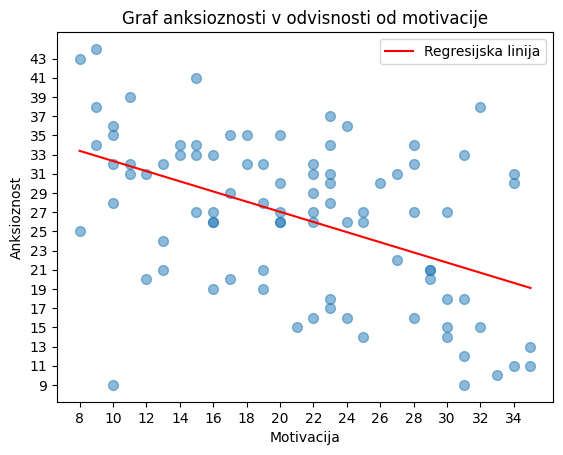

In [20]:
pyplot.scatter(df["Motivacija"], df["Anksioznost"], alpha=0.5, s=50)
pyplot.xlabel('Motivacija')
pyplot.ylabel('Anksioznost')
pyplot.title('Graf anksioznosti v odvisnosti od motivacije')

X = df[["Motivacija"]]
y = df["Anksioznost"]

model = LinearRegression().fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

# Točke, ki določajo regresijsko linijo
x_values = np.linspace(df["Motivacija"].min(), df["Motivacija"].max(), 100)
y_values = intercept + slope * x_values
pyplot.plot(x_values, y_values, color='red', label='Regresijska linija')

pyplot.xticks(np.arange(df["Motivacija"].min(), df["Motivacija"].max() + 1, 2))
pyplot.yticks(np.arange(df["Anksioznost"].min(), df["Anksioznost"].max() + 1, 2))

pyplot.legend()
pyplot.show()

# Spol

Preučili bomo še ali ima spol vpliv na matematično anksioznost (za motivacijo bi bili povsem enaki testi...)

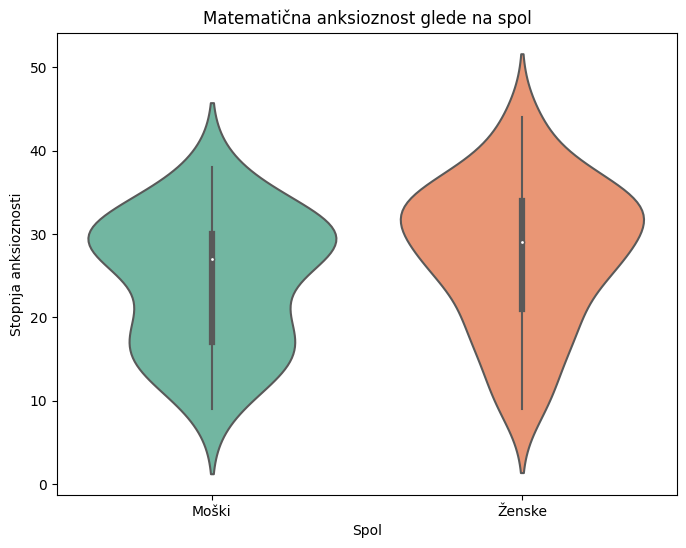

In [21]:
#Spet se poslužimo violinske škatle z brki.Prikažimo jo v malenkost bolj berljivi obliki, kjer min in max ne odrežemo, ampak zaradi estetskih razlogov bolj zvezno nadaljujemo.
#Vključimo pa notri (s sivo) še škatlo z brki.
plt.figure(figsize=(8, 6))
sns.violinplot(x='Spol', y='Anksioznost', data=df, palette='Set2')
plt.title('Matematična anksioznost glede na spol')
plt.xlabel('Spol')
plt.ylabel('Stopnja anksioznosti')
plt.xticks([0, 1], ['Moški', 'Ženske'])  # Dodamo legendo spola
plt.show()

Za začetek bomo uporabili t-test in f-test (oz.enorepno ANOVO). To sicer ni najboljši način na naših podatkih, saj sta ti metodi parametrični. Vseeno ju nakažimo...

f-test sicer ni najboljši način, saj pogosto želimo imeti kategorično spremenljivko (naš primer spol) v več kot dveh kategorijah (mi imamo le dve).

Uporabimo enorepno (angl. one-way), saj imamo le eno kategorično spremenljivko.

In [22]:
male_anxiety = df[df['Spol'] == 0]['Anksioznost']
female_anxiety = df[df['Spol'] == 1]['Anksioznost']

# Izvedemo t-test in f-test
t_stat, p_value = stats.ttest_ind(male_anxiety, female_anxiety)
print(f"T-statistika: {t_stat:.3f}\nP-vrednost: {p_value:.3f}")

print("")

f_stat, p_value = stats.f_oneway(male_anxiety, female_anxiety)
print(f"F-statistika: {f_stat:.3f}\nP-vrednost: {p_value:.3f}")

T-statistika: -1.836
P-vrednost: 0.070

F-statistika: 3.370
P-vrednost: 0.070


Alternativi sta Mann-Whitney U test (oz. Wilcoxonov test vsote rankov) in Kruskal-Wallis-ov test. Oba sta neparametrična. Prvi je bolj primeren za primerjavo zvezna-kategorična, kjer ima kategorična le dve stopnji (kot pri nas spol), drugi pa sprejme tudi več kategorij.

In [23]:
# Mann-Whitney U test

mw_stat, p_value_mw = stats.mannwhitneyu(male_anxiety, female_anxiety)
print(f"Mann-Whitney U statistika: {mw_stat:.3f}\nP-vrednost: {p_value_mw:.3f}")

print("")

# Kruskal-Wallis test
group_anxiety = [df[df['Spol'] == gender]['Anksioznost'] for gender in df['Spol'].unique()]
kw_stat, p_value_kw = stats.kruskal(*group_anxiety)
print(f"Kruskal-Wallis statistika: {kw_stat:.3f}\nP-vrednost: {p_value_kw:.3f}")


Mann-Whitney U statistika: 702.500
P-vrednost: 0.060

Kruskal-Wallis statistika: 3.549
P-vrednost: 0.060


<div style="padding: 10px; border-radius: 5px;">
    <h3 style="color: #9400D3;">Interpretacija</h3>
    <p style="color: #9400D3;">Na naših podatkih spol nima statističnega učinka na matematično anksioznost ($p>0.05$)</p>
</div>

Prikažimo še Cohend $d$ in $\eta^2$ za velikost vpliva kot komplementarno informacijo zgornjih testov. Rezultatov ne bomo interpretirali.

In [24]:
mean_diff = male_anxiety.mean() - female_anxiety.mean()
pooled_std = ((len(male_anxiety) - 1) * male_anxiety.var() + (len(female_anxiety) - 1) * female_anxiety.var()) / (len(male_anxiety) + len(female_anxiety) - 2)
cohens_d = mean_diff / (pooled_std ** 0.5)
print(f"Cohen's d: {cohens_d:.3f}")

ss_between = ((male_anxiety.mean() - df['Anksioznost'].mean())**2 * len(male_anxiety) + (female_anxiety.mean() - df['Anksioznost'].mean())**2 * len(female_anxiety)) / (len(data) - 1)
ss_total = ((male_anxiety - df['Anksioznost'].mean())**2).sum() + ((female_anxiety - df['Anksioznost'].mean())**2).sum()
eta_squared = ss_between / ss_total
print(f"Eta-squared: {eta_squared:.3f}")

Cohen's d: -0.403
Eta-squared: 0.000


# Multivariatna statistika

Čeprav večina metod tukaj niti ni smiselnih, jih vseeno prikažimo :)

## Analiza glavnih komponent (Principal component analysis)

PCA je metoda, pogosto uporabljena za redukcijo dimenzije prostora, v primeru 2D -> 2D pa lahko pomaga z vizualizacijo in manjšanju šuma v podatkih. Predpostavi linearnost, homoskedastičnost in ortogonalnost. Prva dva pogoja sta izpolnjena, tretji pa ne (saj smo zgoraj pokazali korelacijo).

Posebej bomo pobarvali spola (nima pa to pretirane statistične vrednosti...)

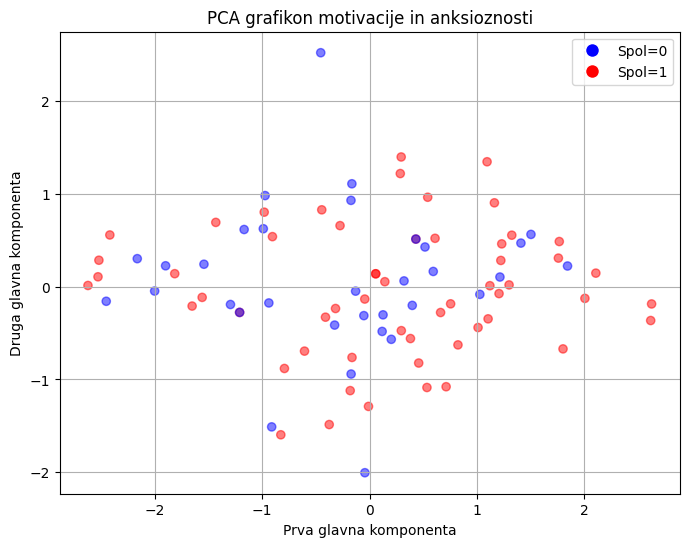

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['Motivacija', 'Anksioznost']]
X_scaled = StandardScaler().fit_transform(X)#Kot smo že skoraj omenili, je za analitično statistiko pogosto skaliranje.

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)#Skaliramo (normalno skalirane) podatke še s PCA metodo

# Naredimo nabor podatkov transformiran na glavne komponente
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Narišimo še diagram
plt.figure(figsize=(8, 6))
# Pobarvamo točke glede na spol. Nekaj točk bo druge barve, če se prekrivajo...
colors = df['Spol'].map({0: 'blue', 1: 'red'})
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=colors, alpha=0.5)
plt.title('PCA grafikon motivacije in anksioznosti')
plt.xlabel('Prva glavna komponenta')
plt.ylabel('Druga glavna komponenta')
plt.grid(True)

# Dodamo legendo za spol
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Spol=0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Spol=1')])
plt.show()


Morda presenetljivo; Dobili smo (iz grafa), da je važna predvsem prva komponenta. Ne vidimo pa morebitnih gručenj v spolu.

Za namene gručenja, si oglejmo še t-SNE metodo, ki ohrani intrinzično strukturo (razdalje), ne predpostavi pa linearnosti.

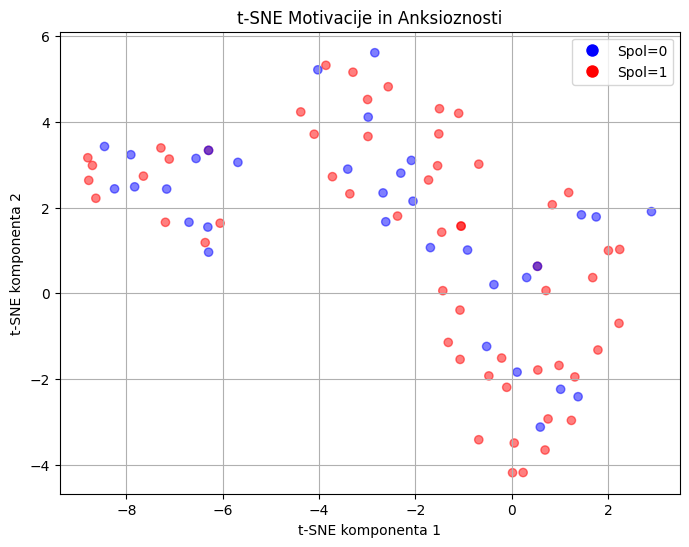

In [26]:
from sklearn.manifold import TSNE

# Skaliramo po t-SNE metodi in naprej enako kot zgoraj
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])

plt.figure(figsize=(8, 6))

colors = df['Spol'].map({0: 'blue', 1: 'red'})
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=colors, alpha=0.5)
plt.title('t-SNE Motivacije in Anksioznosti')
plt.xlabel('t-SNE komponenta 1')
plt.ylabel('t-SNE komponenta 2')
plt.grid(True)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Spol=0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Spol=1')])
plt.show()


Zanimivo, rezultati pri tej metodi povedo še manj...

## Faktorska analiza

Podobno kot PCA, se ta metoda pogosto uporablja za redukcijo dimenzije prostora. Vseeno pa lahko uporabimo bivariantno analizo.

In [27]:
from factor_analyzer import FactorAnalyzer

X = df[['Motivacija', 'Anksioznost']]
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(X)

print(fa.loadings_)  # Factor loadings

[[ 6.93985606e-01  3.81901700e-05]
 [-6.93985604e-01  3.81901709e-05]]


Dobili smo, da ima samo vpliv samo en faktor. Motivacija ga ustrezno viša, anksioznost pa ustrezno manjša. To je seveda popolnoma pričakovano glede na podatke in ne nosi nobene statistične vrednosti :).

## Diskriminantna analiza

Izpustimo, saj na naših podatkih nima smisla...

## MANOVA

Imamo dve odvisni spremenljivki (motivacija in anksioznost) in testiramo, ali se razlikujeta glede na stopnje kategorične neodvisne spremenljivke (spol, razred in profesor)

In [28]:
from statsmodels.multivariate.manova import MANOVA

X = df[['Motivacija', 'Anksioznost']]
y = df[['Razred', 'Profesor', 'Spol']]

manova = MANOVA.from_formula('X ~ Spol + Profesor + Razred', data=df)
print(manova.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value  Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.1436 2.0000 84.0000 250.4482 0.0000
         Pillai's trace 0.8564 2.0000 84.0000 250.4482 0.0000
 Hotelling-Lawley trace 5.9631 2.0000 84.0000 250.4482 0.0000
    Roy's greatest root 5.9631 2.0000 84.0000 250.4482 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
           Spol          Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.9613 2.0000 84.0000  1.6905 0.1906
          Pillai's trace 0.0387 2.0000 84.0000  1.6905 0.1906
  Hotelling-Lawley trace 0

### Interpretacija:

Splošen model: Vse mere (npr. Wilk $\lambda$ [gledamo $Pr > F$], ...) kažejo na statistično signifikanco.

Spol: Ni signifikance

Profesor: Ni signifikance

Razred: Ni signifikance

Rezultati so morda presenetljivi. Dobili smo, da je statistična signifikanca med skupinami, glede na kombinacijo vseh kategoričnih spremenljivk, ni pa razlik glede na posamezne spremenljivke.

## Multipla regresija

Denimo, da želimo napovedati razred (ki je kategorična). Seveda pričakujemo, da ima vpliv na to (pa še to ne popoln vpliv, saj lahko en profesor uči več razredov!) učeči profesor.

In [29]:
import statsmodels.api as sm

X = df[['Motivacija', 'Anksioznost', 'Spol', 'Profesor']]
X = sm.add_constant(X)  # Dodamo neko konstanto za $\beta_0$
y = df['Razred']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Razred   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     33.49
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.09e-16
Time:                        08:49:11   Log-Likelihood:                -138.41
No. Observations:                  89   AIC:                             286.8
Df Residuals:                      84   BIC:                             299.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1623      0.762      0.213      

Seveda smo dobili, kar smo pričakovali. Omenimo, da tu statistika ni bila ravno korektna, saj bi bilo bolje za kategorije namesto "Label encodinga", uporabiti "One hot encoding", ki bi kategorije spravil v različne stolpce.

## Kanonična korelacijska analiza (CCA)

Izpustimo

# Mutual information

Poskusimo še na en način ugotoviti, katere spremenljivke imajo vpliv. Tokrat napovedujmo spol. Uporabimo metodo Mutual information, ki sicer za manjše nabopre podatkov ni najboljša, ima pa prednost, da sprejme različne tipe spremenljivk z lahkoto. Predpostavi tudi, da napovedne spremenljivke niso korelirane (pri nas smo pokazali, da so).

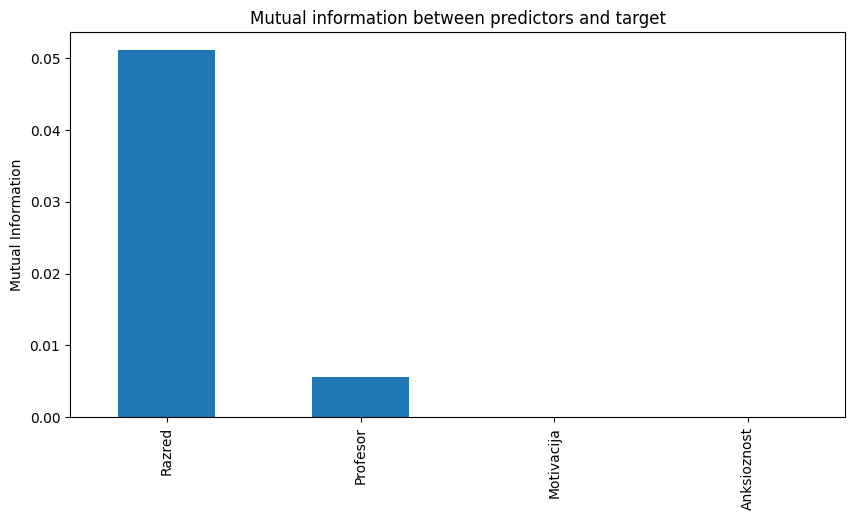

In [30]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

X = df[['Motivacija', 'Anksioznost', 'Razred', 'Profesor']]
y = df['Spol']

# Compute mutual information
mi = mutual_info_classif(X, y, discrete_features=[2,3])

mi = pd.Series(mi)
mi.index = X.columns
sorted_mi = mi.sort_values(ascending=False)

# Plotting the bar chart
ax = sorted_mi.plot.bar(figsize=(10, 5))

plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

plt.show()


Dobili smo, da ima napovedno moč glede na spol največ razred (najbrž je bilo v nekem razredu več punc, v nekem pa več fantov), profesor, anksioznost in motivacija pa nimata napovedne moči. To poudarja, da moramo biti pri evalvaciji rezultatov kritični! Omenimo, da metoda uporablja šum, zato se rezultati ob različnih zagonih kode lahko spreminjajo!

Ali je več punc/fantov glede na razred še preverimo s preštevanjem.

In [31]:
gender_counts_by_class = df.groupby(['Razred', 'Spol']).size().unstack()

print("Gender counts by class:")
print(gender_counts_by_class)

Gender counts by class:
Spol     0   1
Razred        
0        8   6
1        3   8
2        1   9
3        5  12
4        2   6
5       14  15


Res smo dobili, da je v enem razredu več fantov, v večini pa več punc, torej ima rezultat smisel. (omenimo, da anketa ni bila obvezna, zato se zdi, da je učencev na razred malo)

# Dodatek

Še zanimivejše analize (ki uporabljajo te podatke in še nekaj dodatnih) pa najdemo na https://github.com/borbregant/ai_tandem_learning/blob/main/analiza_test.ipynb :)